<a href="https://colab.research.google.com/github/devovevo/cs4220/blob/main/QR_Fact.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import time

import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': lambda x: f"{x:10.4g}"})

In [3]:
def houseHolder(A, K, computeQ=False):
  m,n = A.shape

  if computeQ:
    Q = np.eye(m)

  R = np.copy(A)
  P = np.arange(0,n,1)
  V = np.zeros((m,K))

  for k in range(K):
    # First, find the column with the largest norm
    j = np.argmax(np.sum(np.abs(R[k:,k:])**2, axis=0)) + k

    # Interchange the kth and jth columns of our
    # permutation
    P[[k, j]] = P[[j, k]]

    # Interchange the kth and jth columns of R
    R[:, [k, j]] = R[:, [j, k]]

    # Compute our Householder transform vector
    # First, we take the corresponding column
    # vector from R
    v = np.copy(R[k:,k])
    # Then we reshape it
    v = np.reshape(v, (n-k, 1))

    # Then we subtract off the sign of the
    # first entry times the norm of this vector
    v[0] -= np.sign(v[0]) * np.linalg.norm(v)

    # If our norm isn't zero, we normalize
    # our vector and perform our Householder
    # transform
    norm = np.linalg.norm(v)

    if (norm != 0):
      v /= norm

      # We multiply our Q matrix by our Householder
      # transform, i.e. Q H
      if computeQ:
        Q[:,k:] = Q[:,k:] - 2 * Q[:,k:] @ v @ v.T

      # We multiply our R matrix by our Householder
      # transform, i.e. H R
      R[k:, k:] = R[k:, k:] - 2 * v @ (R[k:, k:].T @ v).T
      # R[k:,k:] = R[k:,k:] - 2 * v @ v.T @ R[k:,k:]

    # Entries below diagonal of kth column should be zero, so we ignore
    # faulty numerical errors and set them to be zero
    R[(k + 1):,k] = np.zeros((m - k - 1))

    # Store the corresponding Householder vector in our V matrix
    V[k:,k] = v[:,0]

  if computeQ:
    return R, P, V, Q
  else:
    return R, P, V

In [6]:
n = 200
A = np.random.randn(n, n)

R, P, V, Q = houseHolder(A, n, computeQ=True)
QN, RN, PN = scipy.linalg.qr(A,pivoting=True)

print("Our R: ", R)
print("Scipy R: ", RN)

diff = R + RN

print("Difference between our R and Scipy's: ", diff)
print("Norm of difference between our R and Scipy's", np.linalg.norm(diff, ord=2))

print("Is our householder R close to scipy's? ", np.allclose(R, RN))
print("Is our householder Q close to scipy's? ", np.allclose(Q, QN))
print("Is our householder P close to scipy's? ", np.allclose(P, PN))
print("Is our householder QR close to A?", np.allclose(A[:, P], Q @ R))

Our R:  [[     15.99    -0.7839     -1.138 ...    -0.1532     0.6852     0.7725]
 [         0      15.77       1.77 ...       2.35     0.5886      1.048]
 [         0          0     -15.59 ...     -0.159     -1.113     0.9553]
 ...
 [         0          0          0 ...     0.6005    0.07589    -0.3841]
 [         0          0          0 ...          0    -0.4415   0.001367]
 [         0          0          0 ...          0          0    -0.2669]]
Scipy R:  [[    -15.99     0.7839      1.138 ...     0.1532    -0.6852    -0.7725]
 [         0     -15.77      -1.77 ...      -2.35    -0.5886     -1.048]
 [         0          0      15.59 ...      0.159      1.113    -0.9553]
 ...
 [         0          0          0 ...    -0.6005   -0.07589     0.3841]
 [         0          0          0 ...          0     0.4415  -0.001367]
 [         0          0          0 ...          0          0    -0.2669]]
Difference between our R and Scipy's:  [[ 7.105e-15  6.661e-16   2.22e-16 ... -4.441e-16  8.88

In [ ]:
def timePivotedHouseholder(sizes, num_repetitions):
  times = []
  for (m,n,K) in sizes:
    A = np.random.randn(m, n)
    running_average = 0
    for r in range(num_repetitions):
      start = time.time()
      R, P, V = houseHolder(A, K)
      end = time.time()
      running_average += end - start
    times.append(running_average / num_repetitions)
  return times

In [ ]:
m_sizes = np.arange(500, 6000, 500)
n_sizes = np.arange(500, 6000, 500)
mn_sizes = np.arange(500, 4000, 500)
k_sizes = 20

m_linear = [(m, 500, 20) for m in m_sizes]
n_linear = [(500, n, 20) for n in n_sizes]
mn_quadratic = [(m, m, 20) for m in mn_sizes ]

times_m = timePivotedHouseholder(m_linear, 5)
times_n = timePivotedHouseholder(n_linear, 5)
times_mn = timePivotedHouseholder(mn_quadratic, 3)

Slope while varying m:  0.9083310054328272
Slope while varying n:  0.6464236719652859
Slope while varying m and n simultaneously:  2.1529627334806087


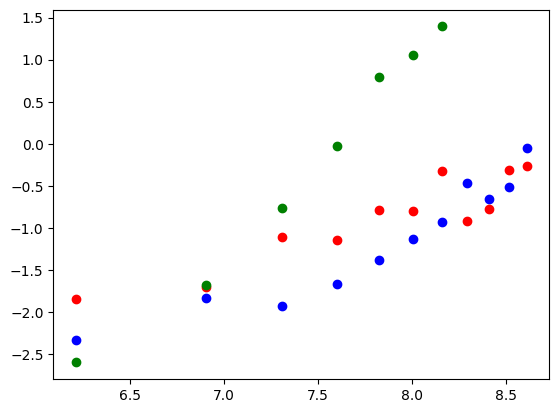

In [ ]:
log_m_sizes = np.log(m_sizes)
log_n_sizes = np.log(m_sizes)
log_mn_sizes = np.log(mn_sizes)

log_m_times = np.log(times_m)
log_n_times = np.log(times_n)
log_mn_times = np.log(times_mn)

m_slope, _ = np.polyfit(log_m_sizes, log_m_times, 1)
n_slope, _ = np.polyfit(log_n_sizes, log_n_times, 1)
mn_slope, _ = np.polyfit(log_mn_sizes, log_mn_times, 1)

print("Slope while varying m: ", m_slope)
print("Slope while varying n: ", n_slope)
print("Slope while varying m and n simultaneously: ", mn_slope)

plt.scatter(log_m_sizes, log_m_times, c='b', label="M")
plt.scatter(log_n_sizes, log_n_times, c='r', label = "N")
plt.scatter(log_mn_sizes, log_mn_times, c='g', label="MN")
plt.show()

In [21]:
n = 200
m = 2
k = 100

X = np.random.uniform(low=0,high=1,size=(n,m))
X_squared_dist = -2 * scipy.spatial.distance.squareform(scipy.spatial.distance.pdist(X)) ** 2
G = np.exp(X_squared_dist)

HR, HP, HV, HQ = houseHolder(G, K=k, computeQ=True)
SU, SD, SV = np.linalg.svd(G, full_matrices=False)
S = np.diag(SD)

Error_Householder = np.linalg.norm(HR[k:, k:])
# Error_Householder = np.linalg.norm(G[:, HP] - HQ[:, :k] @ HR[:k, :], ord=2)
Error_SVD = SD[k + 1]
# Error_SVD = np.linalg.norm(G - SU[:, :k] @ S[:k, :k] @ SV[:k, :], ord=2)

print("Householder Error Norm: ", Error_Householder)
print("SVD Error Norm: ", Error_SVD)

Householder Error Norm:  1.99401012184797e-14
SVD Error Norm:  1.1539833747123471e-14


In [22]:
W1 = np.loadtxt(open("W1.txt", "rb"), delimiter=",")
W2 = np.loadtxt(open("W2.txt", "rb"), delimiter=",")
W3 = np.loadtxt(open("W3.txt", "rb"), delimiter=",")
W4 = np.loadtxt(open("W4.txt", "rb"), delimiter=",")
W5 = np.loadtxt(open("W5.txt", "rb"), delimiter=",")
W6 = np.loadtxt(open("W6.txt", "rb"), delimiter=",")
W7 = np.loadtxt(open("W7.txt", "rb"), delimiter=",")
WS = np.loadtxt(open("WS.txt", "rb"), delimiter=",")

XC = np.loadtxt(open("XC.txt", "rb"), delimiter=",")
XT = np.loadtxt(open("XT.txt", "rb"), delimiter=",")

y = np.loadtxt(open("y.txt", "rb"), delimiter=",")

FileNotFoundError: [Errno 2] No such file or directory: 'W1.txt'

In [ ]:
def fully_connected(W, x):
  xTW = x.T @ W
  return xTW * (xTW > 0)

def model(Layers, WS, x):
  output = x
  for W in Layers:
    output = fully_connected(W, output)
  return scipy.special.softmax(output.T @ WS)

layers = [W1, W2, W3, W4, W5, W6, W7]
x = XC[:, 0]
model(layers, WS, x)

array([   0.09397,    0.08969,    0.09261,    0.09239,    0.09363,
           0.1101,    0.09843,     0.1145,     0.1047,     0.1101])